# Plotting using rasterio

In [19]:
import rasterio
import rasterio.plot
import glob
import matplotlib.pyplot as plt
import numpy as np

In [41]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_nb        = '99'

data_path = f'{computer_path}data/'


single_band_image = f'{data_path}NDVI/T31UFS_20200719T105031_NDVI.tif'

multi_band_image = f'{data_path}PLEIADE/IMG_PHR1B_MS_202204241047288_ORT_6321931101-2_R1C1.TIF'

## Plotting single band image

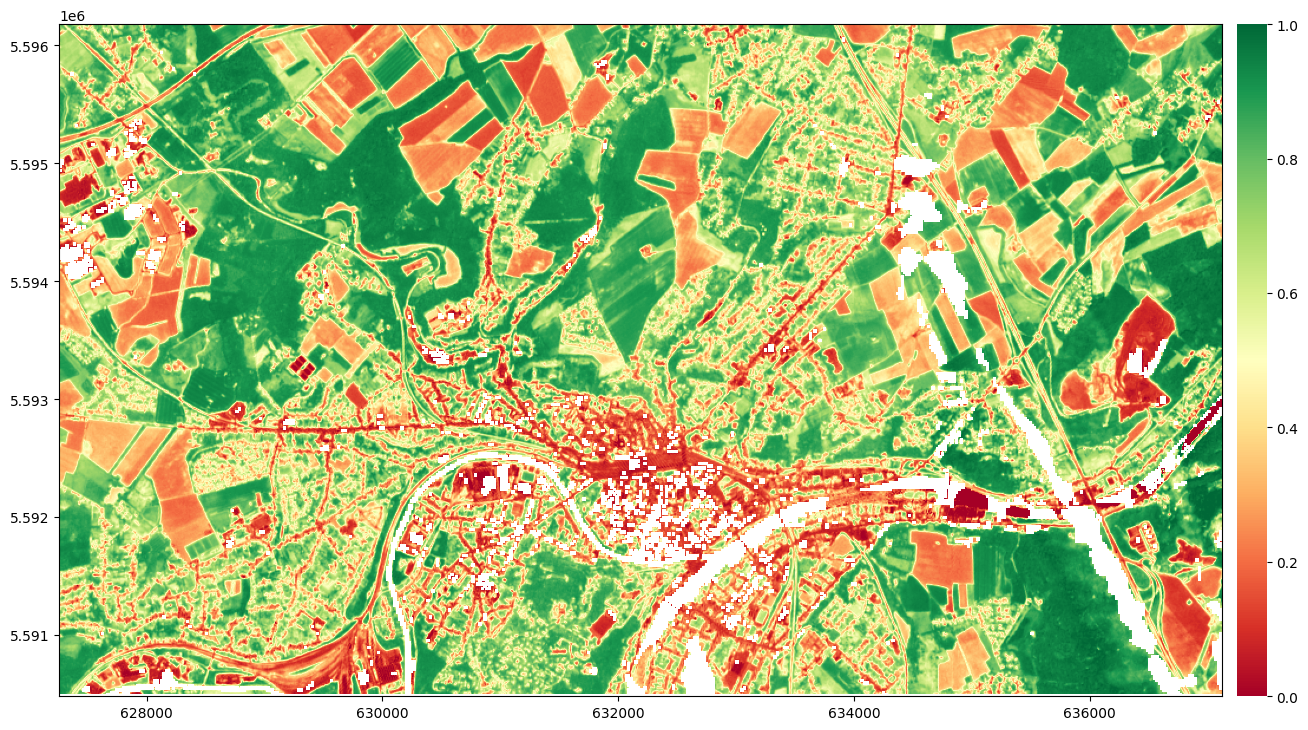

In [38]:
# Create a figure object
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Open image with rasterio
src = rasterio.open(single_band_image, "r")

# Get color map with matplotlib
color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()

# Plot image
im_rio = rasterio.plot.show(src,
                            cmap=color_map,
                            vmin=0,
                            vmax=1,
                            ax=ax)

im_rio = im_rio.get_images()[0]

# Add color bar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)


plt.box(False)

## Plotting multi-band image

**Functions to normalize reflectances values**

Source : https://gis.stackexchange.com/questions/338074/plot-rgb-using-rasterio

In [39]:
def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def norm_min_max(band, band_min, band_max):
    return ((band - band_min)/(band_max - band_min))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


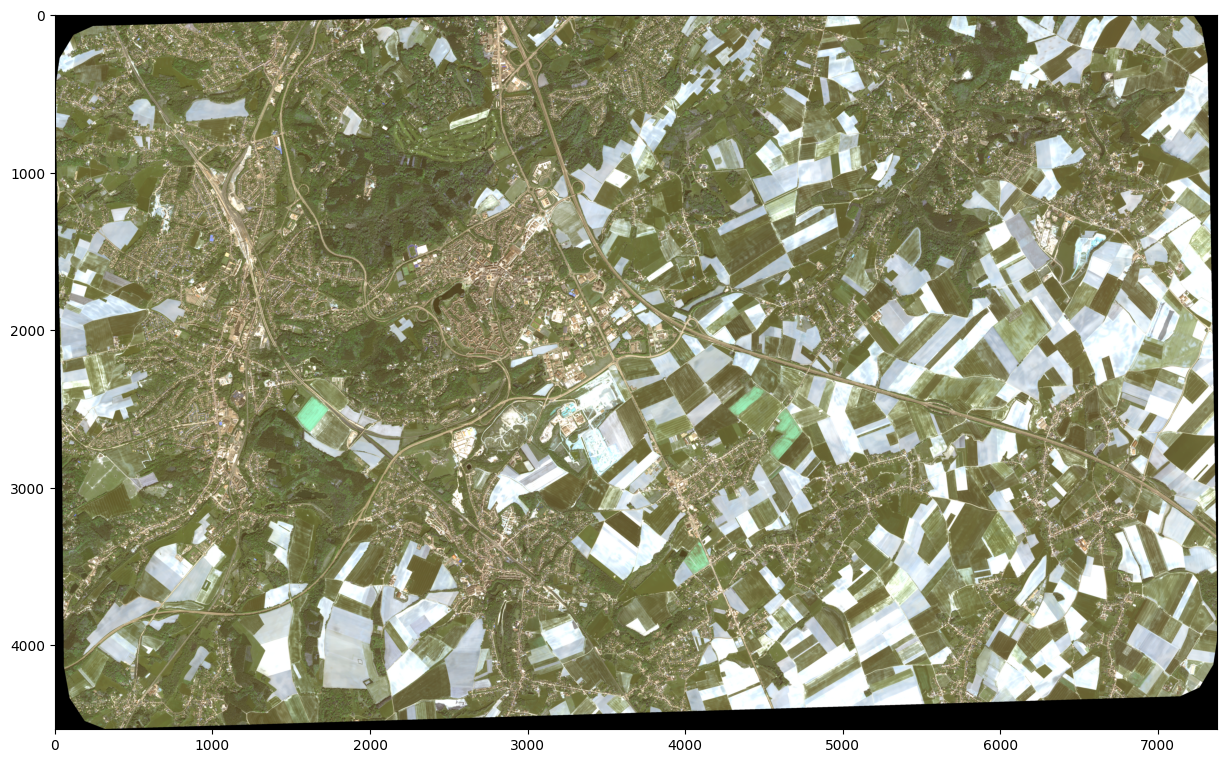

In [42]:
# Create a figure object
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Open image with rasterio
src = rasterio.open(multi_band_image, "r")

# Read image as Numpy array
image = src.read()


b2 = norm_min_max(image[0].astype(float),0,2200)
b3 = norm_min_max(image[1].astype(float),0,1800)
b4 = norm_min_max(image[2].astype(float),0,1400)

# Create RGB
rgb = np.dstack((b4,b3,b2))

# Visualize RGB
plt.imshow(rgb)